```prompt
너는 엄청난 데이터분석가야
- web_traffic_conversion_2024.csv 을 데이터 전처리 
- 현재 선택 셀에 작성
[업무]
- date 컬럼을 datetime 형식으로 변환하고,
- 요일 정보를 나타내는 새로운 컬럼 weekday를 추가하시오. (Monday, Tuesday, ...) 
```


In [1]:
import pandas as pd

# Load the CSV data
df = pd.read_csv('./web_traffic_conversion_2024.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Add a new 'weekday' column
df['weekday'] = df['date'].dt.day_name()

# Display the first few rows of the dataframe
df.head()

,date,visitors,conversion_rate,purchases,weekday
0,2024-01-01,1964,0.0243,47,Monday
1,2024-01-02,2505,0.0517,129,Tuesday
2,2024-01-03,2899,0.0238,68,Wednesday
3,2024-01-04,2142,0.0185,39,Thursday
4,2024-01-05,2606,0.0486,126,Friday


```prompt
너는 엄청난 데이터분석가야

df 에 대한 기초 분석
현재 선택 셀에 작성 [업무]
요일별 평균 방문자 수, 전환율, 구매 건수를 각각 집계하고 표로 나타내시오.
요일별 전환율을 막대 그래프로 시각화하시오.
```


     weekday     visitors  conversion_rate  purchases
0     Friday  2058.596154         0.038502  77.980769
1     Monday  1997.150943         0.034245  68.169811
2   Saturday  1349.596154         0.036581  49.711538
3     Sunday  1403.173077         0.035731  48.576923
4   Thursday  1997.365385         0.036877  70.769231
5    Tuesday  1924.557692         0.044725  85.461538
6  Wednesday  1922.153846         0.033308  63.384615


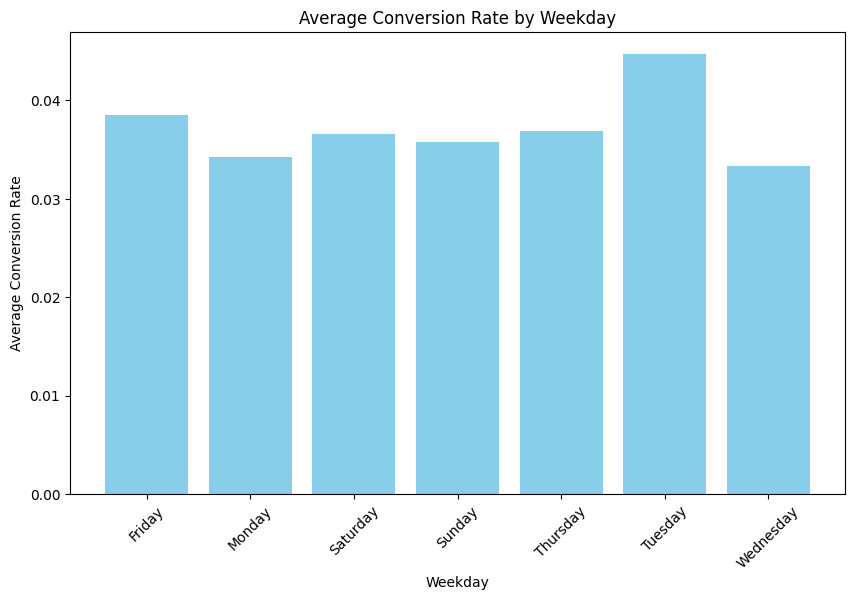

In [2]:
# Calculate average visitors, conversion rate, and purchase count per weekday
weekday_summary = df.groupby('weekday').agg({
    'visitors': 'mean',
    'conversion_rate': 'mean',
    'purchases': 'mean'
}).reset_index()

# Display the summary table
print(weekday_summary)

# Visualize the conversion rate by weekday
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(weekday_summary['weekday'], weekday_summary['conversion_rate'], color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Average Conversion Rate')
plt.title('Average Conversion Rate by Weekday')
plt.xticks(rotation=45)
plt.show()

```prompt
너는 엄청난 데이터분석가야
- df 에 대한 주말 vs 주중 비교
- 현재 선택 셀에 작성
[업무]
- 주말(Saturday, Sunday)과 주중(Monday~Friday)의 전환율 평균을 비교하시오.
- 구매 건수의 평균도 함께 비교하시오.
- 시각화(예: boxplot 또는 barplot)를 활용하면 가산점!
```


   is_weekend  conversion_rate  purchases
0       False         0.037519  73.134100
1        True         0.036156  49.144231


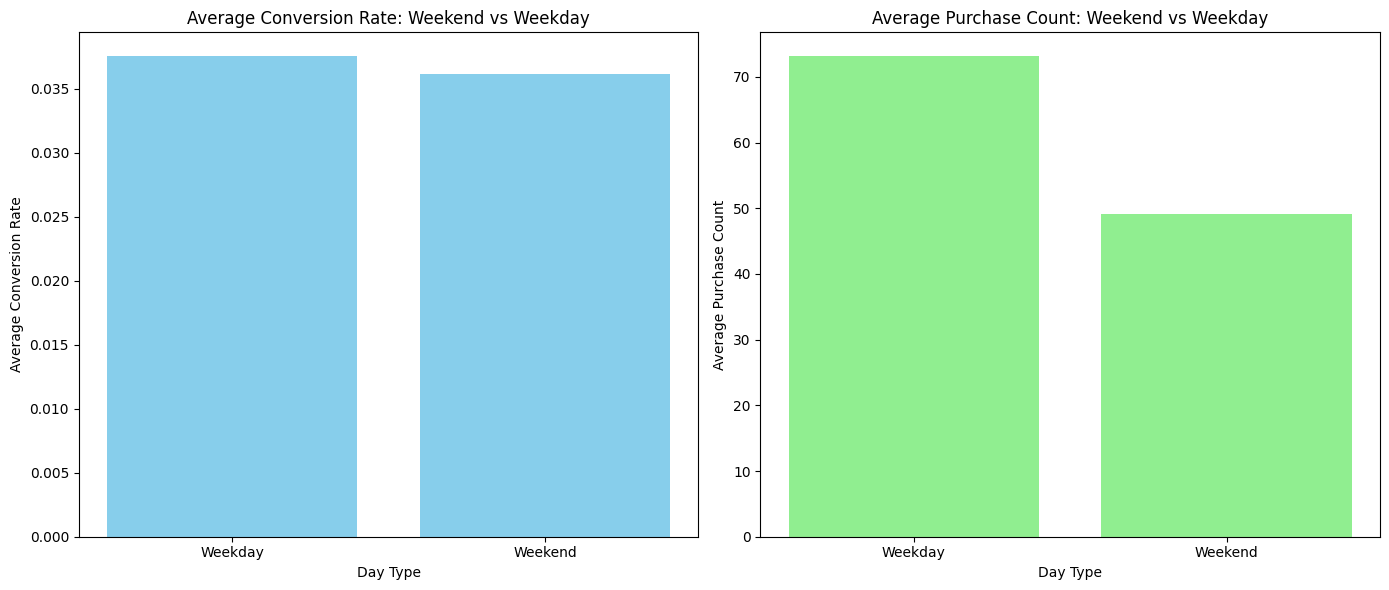

In [3]:
# Compare average conversion rate and purchase count between weekends and weekdays
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday'])
weekend_vs_weekday = df.groupby('is_weekend').agg({
    'conversion_rate': 'mean',
    'purchases': 'mean'
}).reset_index()

# Display the comparison table
print(weekend_vs_weekday)

# Visualize the comparison using bar plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for conversion rate
ax[0].bar(weekend_vs_weekday['is_weekend'].map({True: 'Weekend', False: 'Weekday'}), weekend_vs_weekday['conversion_rate'], color='skyblue')
ax[0].set_xlabel('Day Type')
ax[0].set_ylabel('Average Conversion Rate')
ax[0].set_title('Average Conversion Rate: Weekend vs Weekday')

# Bar plot for purchase count
ax[1].bar(weekend_vs_weekday['is_weekend'].map({True: 'Weekend', False: 'Weekday'}), weekend_vs_weekday['purchases'], color='lightgreen')
ax[1].set_xlabel('Day Type')
ax[1].set_ylabel('Average Purchase Count')
ax[1].set_title('Average Purchase Count: Weekend vs Weekday')

plt.tight_layout()
plt.show()

```prompt
너는 엄청난 데이터분석가야
- 위에서 얻은 분석 결과를 바탕으로 인사이트 도출
- 현재 선택 셀에 작성
[업무]
- 전환율이 가장 높은 요일은?
- 주말과 주중의 구매 행동 차이는?
- 마케팅 캠페인을 언제 집중해야 할까?
```


In [4]:
# Determine the day with the highest conversion rate
highest_conversion_day = weekday_summary.loc[weekday_summary['conversion_rate'].idxmax(), 'weekday']
print(f'전환율이 가장 높은 요일은: {highest_conversion_day}')

# Compare weekend and weekday purchase behavior
weekend_vs_weekday_comparison = weekend_vs_weekday.copy()
weekend_vs_weekday_comparison['is_weekend'] = weekend_vs_weekday_comparison['is_weekend'].map({True: 'Weekend', False: 'Weekday'})
print('주말과 주중의 구매 행동 차이:')
print(weekend_vs_weekday_comparison)

# Marketing campaign suggestion
if weekend_vs_weekday.loc[weekend_vs_weekday['is_weekend'] == True, 'conversion_rate'].values[0] > weekend_vs_weekday.loc[weekend_vs_weekday['is_weekend'] == False, 'conversion_rate'].values[0]:
    print('마케팅 캠페인을 주말에 집중하세요.')
else:
    print('마케팅 캠페인을 주중에 집중하세요.')

전환율이 가장 높은 요일은: Tuesday
주말과 주중의 구매 행동 차이:
  is_weekend  conversion_rate  purchases
0    Weekday         0.037519  73.134100
1    Weekend         0.036156  49.144231
마케팅 캠페인을 주중에 집중하세요.


## chatgpt canvas 사용

```prompt
너는 데이터 분석 전문가야
- 분석 결과에 맞게 결론 3~5문장 이내 요약

[분석 결과]
전환율이 가장 높은 요일은: Tuesday
주말과 주중의 구매 행동 차이:
  is_weekend  conversion_rate  purchases
0    Weekday         0.037519  73.134100
1    Weekend         0.036156  49.144231
마케팅 캠페인을 주중에 집중하세요.
```

```answer
[결론]
전환율이 가장 높은 요일은 화요일이며, 전체적으로 주중(0.0375)이 주말(0.0362)보다 전환율이 높습니다. 또한, 주중의 평균 구매량(73.13)이 주말(49.14)보다 훨씬 많아 구매 활동이 활발합니다. 따라서 마케팅 캠페인은 주중, 특히 화요일을 중심으로 집중하는 것이 효과적입니다.
```

```prompt
현재 까지 모든 내용을 종합해 마케팅팀에 보낼 이메일 초안 형식으로 작성
```

```answer

**제목:** [마케팅 전략 제안] 주중 캠페인 집중 운영 방안  

**내용:**  

안녕하세요, 마케팅팀 여러분.  

최근 데이터 분석 결과를 공유드립니다. 전환율 분석에 따르면, **가장 높은 전환율을 보이는 요일은 화요일**이며, 전반적으로 **주중(0.0375)이 주말(0.0362)보다 높은 전환율을 기록**하고 있습니다. 또한, **평균 구매량 역시 주중(73.13)이 주말(49.14)보다 높아** 주중에 고객 활동이 더욱 활발하게 이루어지는 것으로 나타났습니다.  

이를 고려하여, 마케팅 캠페인은 **주중, 특히 화요일을 중심으로 운영하는 전략**이 효과적일 것으로 판단됩니다. 이에 대한 추가 논의가 필요하시다면 회의를 제안드리겠습니다.  

감사합니다.  
[보낸 사람 이름]  
[직책/팀명]  
[연락처]  

```